# Import bibliotek

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Train shape: (20000, 11), Test shape: (5000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              20000 non-null  int64  
 1   Income           20000 non-null  float64
 2   CreditScore      17617 non-null  float64
 3   LoanAmount       20000 non-null  float64
 4   EmploymentYears  20000 non-null  int64  
 5   NumDependents    20000 non-null  int64  
 6   DebtToIncome     20000 non-null  float64
 7   EducationLevel   20000 non-null  int64  
 8   FavoriteColor    20000 non-null  object 
 9   Hobby            20000 non-null  object 
 10  Default          20000 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1.7+ MB


# Wczytanie danych

In [27]:
train_df = pd.read_parquet('train.parquet')
test_df = pd.read_parquet('test.parquet')
print(f'Train shape: {train_df.shape}, Test shape: {test_df.shape}')

Train shape: (20000, 11), Test shape: (5000, 11)


# Analiza zbioru treningowego
W poniższej sekcji przeanalizowano zbiór treningowy danych. W pierwszej kolejności ze zbioru wykluczono dane niemające uzasadnienia biznesowego (FavoriteColor oraz Hobby).

In [26]:
train_df = train_df.drop(columns=['FavoriteColor', 'Hobby'])
null_counts = train_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Age                   0
Income                0
CreditScore        2383
LoanAmount            0
EmploymentYears       0
NumDependents         0
DebtToIncome          0
EducationLevel        0
Default               0
dtype: int64


In [28]:
train_df.describe()

,Age,Income,CreditScore,LoanAmount,EmploymentYears,NumDependents,DebtToIncome,EducationLevel,Default
count,20000.000000,20000.000000,17617.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,44.959150,50004.431236,574.118635,20030.527761,19.369250,1.98985,0.502592,2.506150,0.343150
std,14.083764,15019.289666,159.041321,4992.059462,11.548159,1.41193,0.289153,1.116882,0.474773
min,21.000000,-16984.057953,300.000000,-2314.842635,0.000000,0.00000,0.000018,1.000000,0.000000
25%,33.000000,39716.883271,437.000000,16646.478319,9.000000,1.00000,0.251572,2.000000,0.000000
50%,45.000000,50084.103696,575.000000,20046.233086,19.000000,2.00000,0.501503,3.000000,0.000000
75%,57.000000,60285.318369,711.000000,23393.056940,29.000000,3.00000,0.753517,4.000000,1.000000
max,69.000000,117186.263765,849.000000,38800.776243,39.000000,4.00000,0.999984,4.000000,1.000000


W zbiorze treningowym braki wsytępują w kolumnie 'CreditScore' - 2383 wartości null. Jako że jest to jedna z najistotniejszych zmiennych w predykcji niewypłacalności, usunięcie wierszy z brakami (stanowiących ponad 10% danych treningowych) byłoby nieoptymalne. Z tego też powodu zdecydowano o zastosowaniu imputacji w kolejnych krokach.

Default
0    13137
1     6863
Name: count, dtype: int64


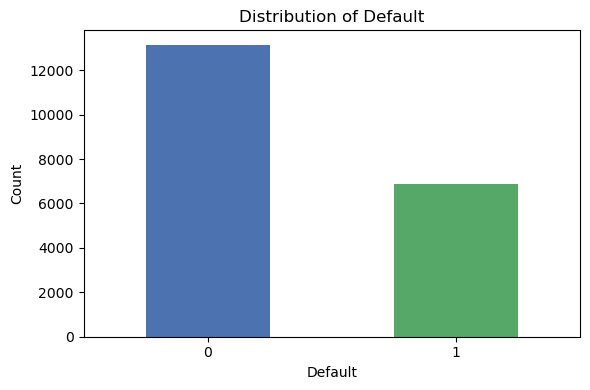

In [22]:
# Rozkład zmiennej docelowej "Default"
print(train_df['Default'].value_counts())
plt.figure(figsize=(6,4))
train_df['Default'].value_counts().sort_index().plot(kind='bar', color=['#4c72b0','#55a868'])
plt.title('Distribution of Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
#Analiza zmiennych ciągłych
cont_features = ['Age', 'Income', 'CreditScore', 'LoanAmount', 'EmploymentYears', ]